In [92]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [64]:
brent = pd.read_csv('Brent_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "brent"})
gold = pd.read_csv('Gold_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "gold"})
palladium = pd.read_csv('Palladium_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "palladium"})
platinum = pd.read_csv('Platinum_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "platinum"})
plumbum = pd.read_csv('Plumbum_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "plumbum"})
silver = pd.read_csv('Silver_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "silver"})
sp500 = pd.read_csv('S&P500_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "sp500"})
cuprum = pd.read_csv('Сuprum_220324_240311.csv', index_col=0)[['<CLOSE>']].rename(columns={"<CLOSE>": "cuprum"})

In [65]:
brent = brent[~brent.index.duplicated(keep='first')]
gold = gold[~gold.index.duplicated(keep='first')]
palladium = palladium[~palladium.index.duplicated(keep='first')]
platinum = platinum[~platinum.index.duplicated(keep='first')]
plumbum = plumbum[~plumbum.index.duplicated(keep='first')]
silver = silver[~silver.index.duplicated(keep='first')]
sp500 = sp500[~sp500.index.duplicated(keep='first')]
cuprum = cuprum[~cuprum.index.duplicated(keep='first')]

In [74]:
df = pd.concat([silver, sp500, gold, brent, palladium, platinum, plumbum, cuprum], axis=1, join="inner")

In [156]:
df.head()

,silver,sp500,gold,brent,palladium,platinum,plumbum,cuprum
<DATE>,,,,,,,,
24/03/22,25.955,4520.16,1961.5,118.20,2534.0,1029.9,2314.00,10415.774435
25/03/22,25.725,4543.06,1957.6,119.98,2343.5,1005.6,2353.25,10339.714700
29/03/22,24.955,4631.60,1923.0,108.56,2152.5,983.5,2389.00,10491.834170
30/03/22,24.770,4602.45,1929.4,111.00,2269.0,994.0,2424.50,10463.173980
31/03/22,25.005,4530.41,1943.1,105.65,2278.5,988.1,2420.50,10442.229995


#### Перейдём к доходностям.

In [107]:
silver_diff = np.log(df.silver.values[1:] / df.silver.values[:-1])
sp500_diff = np.log(df.sp500.values[1:] / df.sp500.values[:-1])
gold_diff = np.log(df.gold.values[1:] / df.gold.values[:-1])
brent_diff = np.log(df.brent.values[1:] / df.brent.values[:-1])
palladium_diff = np.log(df.palladium.values[1:] / df.palladium.values[:-1])
platinum_diff = np.log(df.platinum.values[1:] / df.platinum.values[:-1])
plumbum_diff = np.log(df.plumbum.values[1:] / df.plumbum.values[:-1])
cuprum_diff = np.log(df.cuprum.values[1:] / df.cuprum.values[:-1])

In [141]:
%%R -i silver_diff -i sp500_diff -i gold_diff -i brent_diff -i palladium_diff -i platinum_diff -i plumbum_diff -i cuprum_diff -i brent_diff -i palladium_diff -i platinum_diff -i plumbum_diff -i cuprum_diff
model <- lm(silver_diff ~ sp500_diff + gold_diff + brent_diff + palladium_diff + platinum_diff + plumbum_diff + cuprum_diff)
summary(model)


Call:
lm(formula = silver_diff ~ sp500_diff + gold_diff + brent_diff + 
    palladium_diff + platinum_diff + plumbum_diff + cuprum_diff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036400 -0.006439 -0.000518  0.006370  0.053961 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.0003895  0.0005064  -0.769 0.442153    
sp500_diff      0.1914831  0.0464411   4.123 4.42e-05 ***
gold_diff       1.3172963  0.0662362  19.888  < 2e-16 ***
brent_diff     -0.0298142  0.0242696  -1.228 0.219892    
palladium_diff  0.0089627  0.0231854   0.387 0.699252    
platinum_diff   0.1490577  0.0398504   3.740 0.000206 ***
plumbum_diff    0.0016738  0.0333006   0.050 0.959934    
cuprum_diff     0.1121580  0.0460122   2.438 0.015158 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01099 on 468 degrees of freedom
Multiple R-squared:  0.6458,	Adjusted R-squared:  0.6405 
F-statistic: 121.9 on 7 an

### На уровне значимосьти 0.95 значимыми остались только: S&P500, GOLD, Platinum. Модель не вырождена.

In [144]:
%%R
model <- lm(silver_diff ~ sp500_diff + gold_diff + platinum_diff)
summary(model)


Call:
lm(formula = silver_diff ~ sp500_diff + gold_diff + platinum_diff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036569 -0.006916 -0.000601  0.006546  0.051437 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.0004326  0.0005061  -0.855    0.393    
sp500_diff     0.2086059  0.0456300   4.572 6.19e-06 ***
gold_diff      1.3398905  0.0656173  20.420  < 2e-16 ***
platinum_diff  0.1804574  0.0339674   5.313 1.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01103 on 472 degrees of freedom
Multiple R-squared:  0.6404,	Adjusted R-squared:  0.6381 
F-statistic: 280.2 on 3 and 472 DF,  p-value: < 2.2e-16



### Отобранные предикторы остались значимы и после удаления незначимых.

### Проведём анализ остатков.

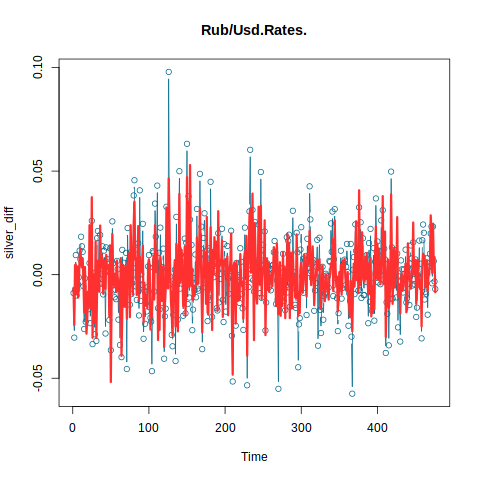

In [149]:
%%R
plot(silver_diff,type = "b",col='deepskyblue4',xlab='Time',main='Rub/Usd.Rates.')
lines(model$fitted.values,col='firebrick1',lwd=3)

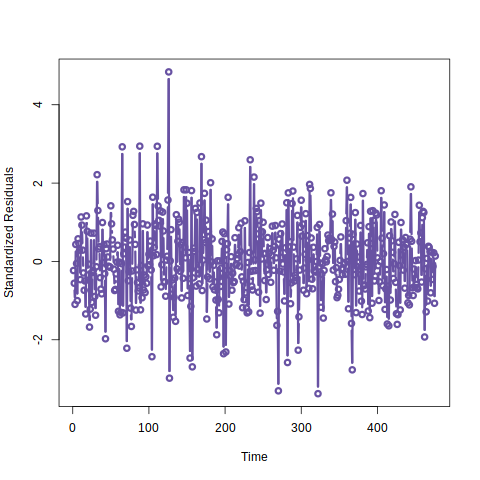

In [150]:
%%R
plot(y = rstudent(model), type = "b", x = c(1:length(rstudent(model))),xlab = "Time",ylab="Standardized Residuals", col = "#6852A3",lwd = 3)

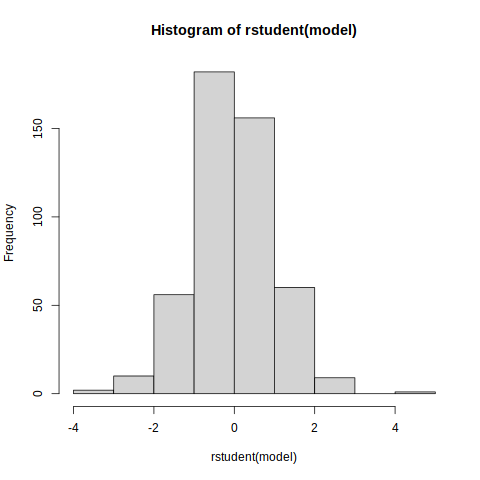

In [151]:
%%R
hist(rstudent(model))

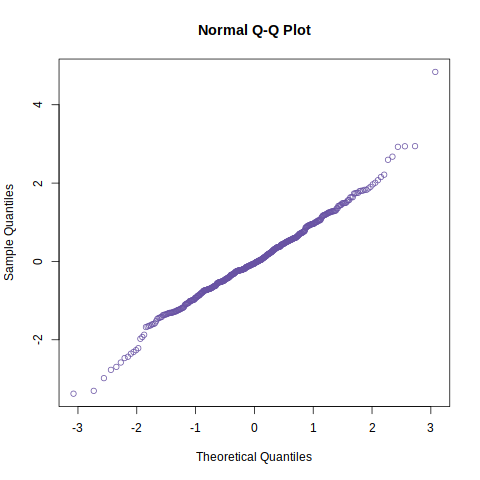

In [153]:
%%R
qqnorm(rstudent(model),col = "#6852A3")

In [154]:
%%R
shapiro.test((rstudent(model)))


	Shapiro-Wilk normality test

data:  (rstudent(model))
W = 0.98695, p-value = 0.0002887



### p_value < 0.05, следовательно гипотеза о нормальности распределения остатков отвергается по тесту Шапиро-Уилка.